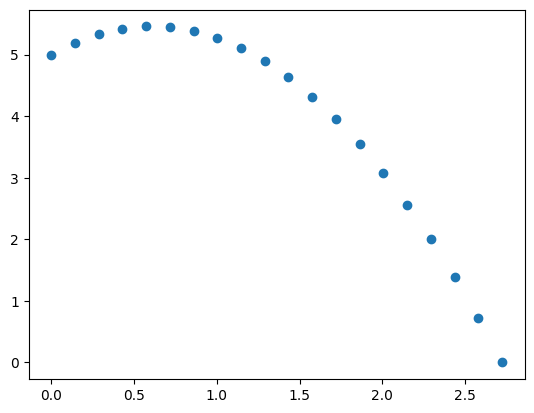

In [3]:
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt


global g 
g=9.8
v0x=2
v0y=3
x0=0
y0=5

pos_y=lambda t, y0, v0y: y0+v0y*t-(g/2)*t**2
pos_x=lambda t, v0x: x0+v0x*t

root=sc.optimize.newton(pos_y, 2, args=(y0, v0y))

t=np.linspace(0, root, 20)

plt.plot(pos_x(t, v0x), pos_y(t, y0, v0y), "o")

X=pos_x(t, v0x)
Y=pos_y(t, y0, v0y)


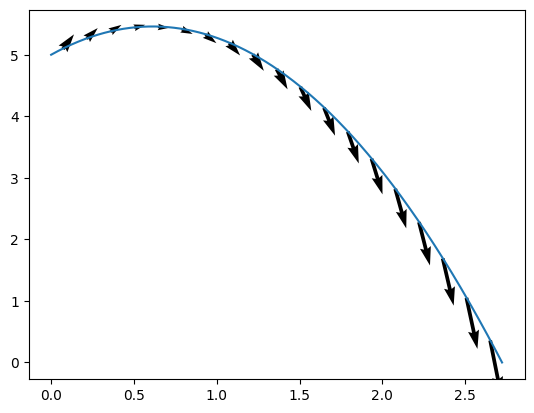

In [31]:
dx=(X[1::]-X[:-1:])/(t[1::]-t[:-1:])
dy=(Y[1::]-Y[:-1:])/(t[1::]-t[:-1:])
oY= (Y[1::]+Y[:-1:])/2
oX= (X[1::]+X[:-1:])/2

plt.quiver(oX, oY, dx, dy)

T=np.linspace(0, root, 1000)
plt.plot(pos_x(T, v0x), pos_y(T, y0, v0y))


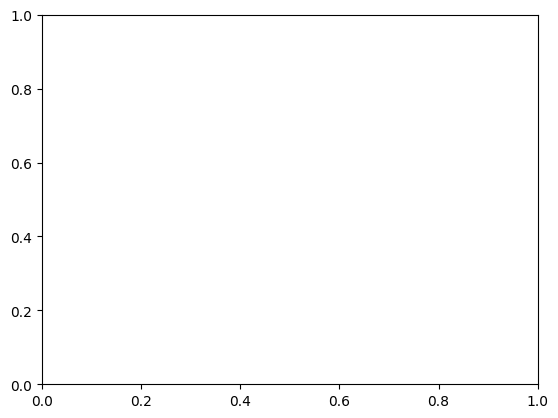

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

# Define your list of vectors with different origin points
vectors = []  # Format: ((x1, y1), (x2, y2))
for i in range(len(oX)):
    vectors.append(((oX[i], oY[i]), (dx[i], dy[i])))

# Create a function to update the plot with each vector
def update_plot(frame):
    plt.cla()  # Clear the current plot
    if frame < len(vectors):
        for j in range(frame):
            origin, end = vectors[j]
            plt.plot(origin[0], pos_y(origin[0]/v0x, y0, v0y), "b.")
            plt.quiver(origin[0], origin[1], end[0], end[1], angles='xy', scale_units='xy', color='red')
        plt.xlim(0, 3)
        plt.ylim(0, 6)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Vector Animation')

# Create the animation
fig = plt.figure()
ani = animation.FuncAnimation(fig, update_plot, frames=len(vectors)+1, interval=1000)

# Save the animation to a file
ani.save('vector_animation.mp4', writer='ffmpeg')

plt.show()

